In [18]:
!pip install numpy matplotlib tensorflow scikit-learn
# Install required libraries for the project
# These are needed for dataset creation, visualization, and deep learning model training

In [19]:
# Import numerical computing library
import numpy as np

# Import plotting library for visualization
import matplotlib.pyplot as plt

# Import TensorFlow for building and training deep learning model
import tensorflow as tf

# Import function to split dataset into train and test sets
from sklearn.model_selection import train_test_split


In [20]:
# Define image size (50x50 grayscale images)
IMG_SIZE = 50

# Define number of samples to generate
NUM_SAMPLES = 10000

# Lists to store images and corresponding labels (coordinates)
X = []
y = []

# Loop to generate synthetic dataset
for _ in range(NUM_SAMPLES):

    # Create a blank 50x50 image filled with zeros
    img = np.zeros((IMG_SIZE, IMG_SIZE))

    # Randomly select x and y coordinates for the bright pixel
    x_coord = np.random.randint(0, IMG_SIZE)
    y_coord = np.random.randint(0, IMG_SIZE)

    # Set the selected pixel value to 255 (bright pixel)
    img[x_coord, y_coord] = 255

    # Append image to input dataset
    X.append(img)

    # Append corresponding coordinates as labels
    y.append([x_coord, y_coord])

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Normalize pixel values from 0–255 to 0–1 for better model training
X = X / 255.0

# Reshape data to include channel dimension for CNN input
# Shape becomes: (samples, 50, 50, 1)
X = X.reshape(-1, 50, 50, 1)

# Print dataset shapes to verify correctness
print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)


Dataset shape: (10000, 50, 50, 1)
Labels shape: (10000, 2)


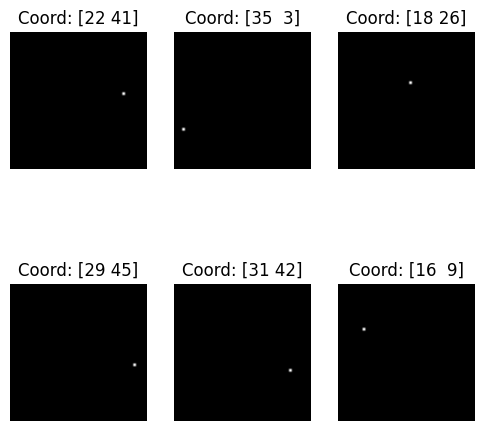

In [21]:
# Display some sample images with their true coordinates
plt.figure(figsize=(6, 6))

# Show first 6 generated images
for i in range(6):
    plt.subplot(2, 3, i + 1)

    # Display image in grayscale
    plt.imshow(X[i].reshape(50, 50), cmap='gray')

    # Show actual coordinates in title
    plt.title(f"Coord: {y[i]}")

    # Hide axis for clean visualization
    plt.axis('off')

# Show the plotted images
plt.show()

In [22]:
# Split dataset into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
# Create a Sequential CNN model
model = tf.keras.Sequential([

    # First convolution layer to detect spatial patterns
    tf.keras.layers.Conv2D(
        16, (3, 3),
        activation='relu',
        input_shape=(50, 50, 1)
    ),

    # Reduce spatial dimensions
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolution layer for deeper feature extraction
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # Further reduce dimensions
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten feature maps into a 1D vector
    tf.keras.layers.Flatten(),

    # Fully connected layer for learning complex patterns
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 2 neurons (predict x and y coordinates)
    tf.keras.layers.Dense(2)
])


In [24]:
# Compile the model with optimizer, loss function, and evaluation metric
model.compile(
    optimizer='adam',       # Adaptive optimizer
    loss='mse',             # Mean Squared Error for regression
    metrics=['mae']         # Mean Absolute Error for performance tracking
)

# Display model architecture summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model on training data
# validation_split=0.1 keeps 10% of training data for validation

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32
)


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - loss: 340.2815 - mae: 14.5437 - val_loss: 33.5405 - val_mae: 3.3993
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - loss: 29.1226 - mae: 3.3024 - val_loss: 16.5999 - val_mae: 2.5593
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 16.3050 - mae: 2.6593 - val_loss: 11.1978 - val_mae: 2.2008
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 11.0728 - mae: 2.2238 - val_loss: 9.1335 - val_mae: 2.0947
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 7.6564 - mae: 1.8419 - val_loss: 5.7235 - val_mae: 1.4965
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 5.1185 - mae: 1.4577 - val_loss: 4.1140 - val_mae: 1.2750
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 3.4394 - mae: 1.1664 - val_loss: 2.7729 - val_mae: 1.0264
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 2.3309 - mae: 0.9498 - val_loss: 1.9287 - val_mae: 0.8487
Epoch 9/20
225/225 ━━━━━━━━━━━━━

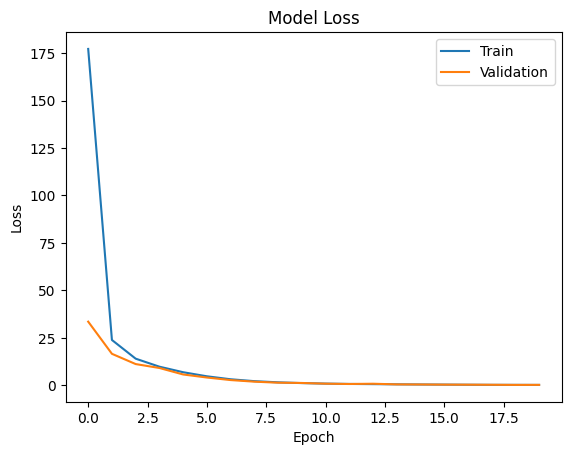

In [26]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Add labels and title
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Add legend to differentiate curves
plt.legend(['Train', 'Validation'])

# Display the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


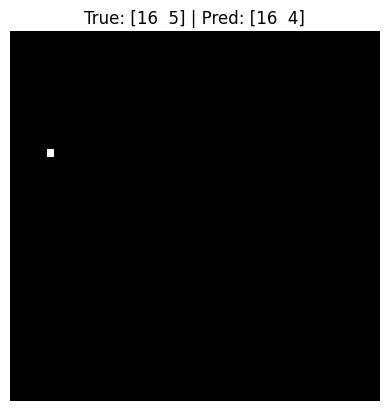

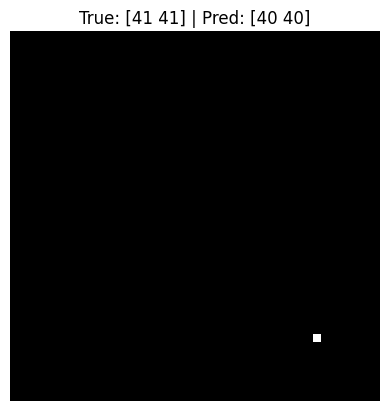

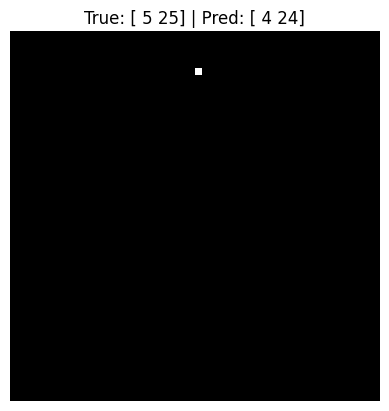

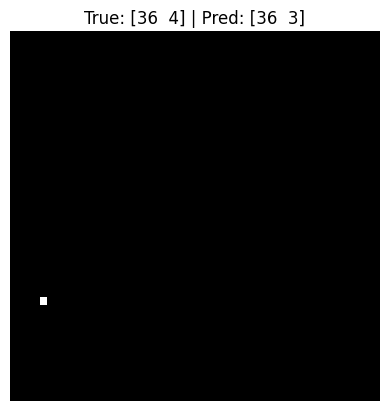

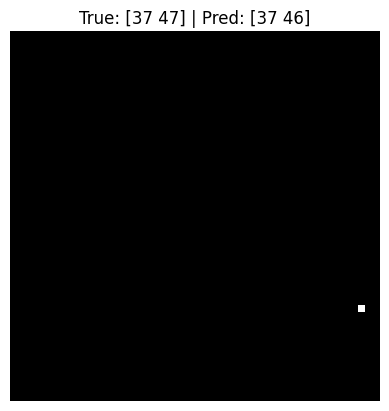

In [27]:
# Predict coordinates for first 10 test images
predictions = model.predict(X_test[:10])

# Show predictions alongside actual coordinates
for i in range(5):

    # Display image
    plt.imshow(X_test[i].reshape(50, 50), cmap='gray')

    # Show true vs predicted coordinates
    plt.title(f"True: {y_test[i]} | Pred: {predictions[i].astype(int)}")

    # Hide axis
    plt.axis('off')

    # Display image
    plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


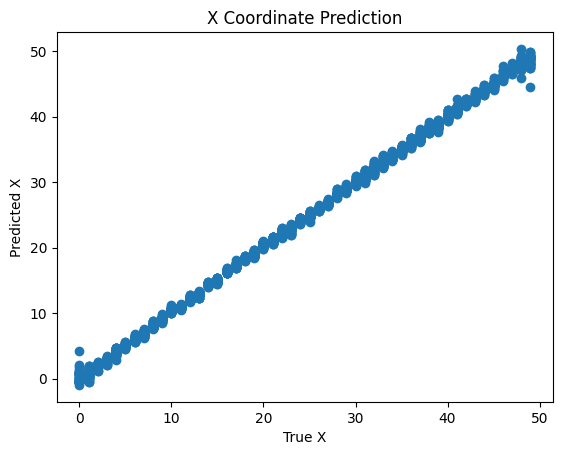

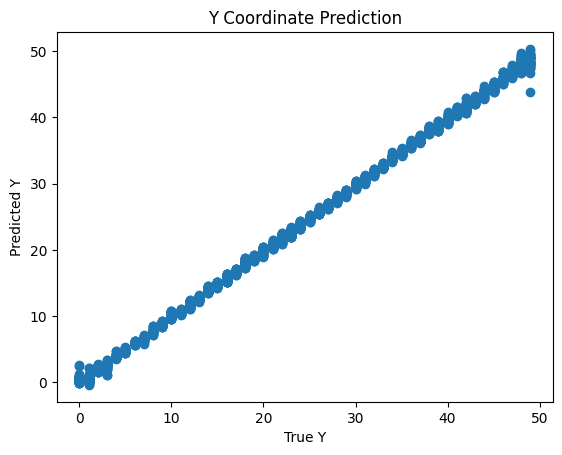

In [28]:
# Predict coordinates for entire test set
pred_all = model.predict(X_test)

# Scatter plot for X coordinate comparison
plt.scatter(y_test[:, 0], pred_all[:, 0])
plt.xlabel("True X")
plt.ylabel("Predicted X")
plt.title("X Coordinate Prediction")
plt.show()

# Scatter plot for Y coordinate comparison
plt.scatter(y_test[:, 1], pred_all[:, 1])
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("Y Coordinate Prediction")
plt.show()


Dataset Explanation (Rationale)

I created our own dataset because the problem is very specific.
Each image is 50×50 pixels and contains only one bright pixel (value 255), while all other pixels are 0.

I randomly placed the bright pixel at different positions and saved its (x, y) location as the label.

I used synthetic data because:

It is easy to generate many images.

I know the exact correct coordinates (perfect ground truth).

It helps the model learn the relationship between the image and the pixel position.

Why Deep Learning (CNN)?

I used a CNN model because:

CNN works well for image data.

It can learn spatial patterns and detect where the bright pixel is located.

It is suitable for problems where position in an image matters.

Why Regression?

This is a regression problem because:

The output is numeric values (x and y coordinates).

The model is predicting positions, not categories.

So the model learns to predict 2 numbers:

X coordinate

Y coordinate

Conclusion

The model learns to find the location of the bright pixel from the image.
Since the dataset is simple and clean, the model can understand the pattern and predict the coordinates correctly.
This shows that deep learning can be used to map images to position values.